In [4]:
from datasets import load_dataset
from datasets import Dataset
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

egy_ds = load_dataset("QCRI/arabic_pos_dialect", "egy")
glf_ds = load_dataset("QCRI/arabic_pos_dialect", "glf")
lev_ds = load_dataset("QCRI/arabic_pos_dialect", "lev")
mgr_ds = load_dataset("QCRI/arabic_pos_dialect", "mgr")

In [5]:
# First, let's look at the data in a pandas DF
egy_df = egy_ds['train'].to_pandas()
glf_df = glf_ds['train'].to_pandas()
lev_df = lev_ds['train'].to_pandas()
mgr_df = mgr_ds['train'].to_pandas()


In [6]:
egy_df

,fold,subfold,words,segments,pos_tags
0,4,A,"[ليه, لما, تحب, حد, من, قلبك, يطلع, واطى, ليه,...","[ليه, لما, تحب, حد, من, قلب+ك, يطلع, واطى, ليه...","[PART, PART, V, NOUN, PREP, NOUN+PRON, V, ADJ,..."
1,4,A,"[عارف, بيقولك, ايه, "", إذا, أخطأت, فأحسن, "", ....","[عارف, ب+يقو+ل+ك, ايه, "", إذا, أخطأ+ت, ف+أحسن,...","[ADJ, PROG_PART+V+PREP+PRON, PART, PUNC, PART,..."
2,3,A,"[الحمد, لله, يا, جدعان, الفرسان, اللي, اتمسكوا...","[ال+حمد, ل+الله, يا, جدعان, ال+فرسان, اللي, ات...","[DET+NOUN, PREP+NOUN, PART, NOUN, DET+NOUN, PA..."
3,1,A,"[بحس, بشخصيتي, القوية, لما, اقول, لاخويا, اعمل...","[ب+حس, ب+شخصي+ت+ي, ال+قوي+ة, لما, اقول, ل+اخو+...","[PROG_PART+V, PREP+NOUN+NSUFF+PRON, DET+ADJ+NS..."
4,5,A,"[@ahmedabodsheesh, يا, باشا, دي, مش, محتاجه, د...","[@ahmedabodsheesh, يا, باشا, دي, مش, محتاج+ه, ...","[MENTION, PART, NOUN, PRON, PART, ADJ+NSUFF, N..."
...,...,...,...,...,...
345,1,B,"[وفي, لحظة, كدة, و, انت, قاعد, مع, ناس, بتضحك,...","[و+في, لحظ+ة, كدة, و, انت, قاعد, مع, ناس, ب+تض...","[CONJ+PREP, NOUN+NSUFF, ADV, CONJ, PRON, ADJ, ..."
346,5,B,"[اللى, بيقول, مش, هينتخب, حمدين, عشان, مش, هين...","[اللى, ب+يقول, مش, ه+ينتخب, حمدين, عشان, مش, ه...","[PART, PROG_PART+V, PART, FUT_PART+V, NOUN, PA..."
347,4,B,"[مفروض, ماتزعلش, عشان, في, ناس, حالها, اوحش, م...","[مفروض, ما+تزعل+ش, عشان, في, ناس, حال+ها, اوحش...","[ADJ, PART+V+NEG_PART, PART, PREP, NOUN, NOUN+..."
348,5,B,"[طب, إدونا, فرصة, نحط, فيشة, الكشاف, في, الكهر...","[طب, إد+و+نا, فرص+ة, نحط, فيش+ة, ال+كشاف, في, ...","[ADJ, V+PRON+PRON, NOUN+NSUFF, V, NOUN+NSUFF, ..."


In [7]:
glf_df

,fold,subfold,words,segments,pos_tags
0,2,B,"[@tagimlm77, @444Tf, هو, ثعلب, مكار, بعد, شوي,...","[@tagimlm77, @444Tf, هو, ثعلب, مكار, بعد, شوي,...","[MENTION, MENTION, PRON, NOUN, ADJ, NOUN, ADJ,..."
1,3,B,"[صدز, لاقال, ان, ريحة, العود, تنعنش, وياهي, تخ...","[صدز, لا+قال, ان, ريح+ة, ال+عود, تنعنش, و+يا+ه...","[NOUN, PART+V, PART, NOUN+NSUFF, DET+NOUN, V, ..."
2,1,B,"[لا, تفكرين, بالماضي, عشان, ما, تتضايقين, ولا,...","[لا, تفكر+ين, ب+ال+ماضي, عشان, ما, تتضايق+ين, ...","[PART, V+PRON, PREP+DET+NOUN, PART, PART, V+PR..."
3,4,B,"[@chanyol_, اي, والله, اعرف, وحده, كذا, لدرجه,...","[@chanyol_, اي, و+الله, اعرف, وحد+ه, كذا, ل+در...","[MENTION, PART, CONJ+NOUN, V, NOUN+NSUFF, ADV,..."
4,5,A,"[في, عآلم, الشعر, والأضوآء, والشهره, والوآقع, ...","[في, عآلم, ال+شعر, و+ال+أضوآء, و+الشهره, و+ال+...","[PREP, NOUN, DET+NOUN, CONJ+DET+NOUN, CONJ+NOU..."
...,...,...,...,...,...
345,1,B,"[@Ghazi_alsmiri, ياهلا, ومية, غلا, ،, ،, مساك,...","[@Ghazi_alsmiri, يا+هلا, و+مي+ة, غلا, ،, ،, مس...","[MENTION, PART+NOUN, CONJ+NUM+NSUFF, NOUN, PUN..."
346,3,A,"[اكثر, شي, جذبني, لوحة, السيارة, ههههه, رقم, ج...","[اكثر, شي, جذب+ني, لوح+ة, ال+سيار+ة, ههههه, رق...","[ADJ, NOUN, V+PRON, NOUN+NSUFF, DET+NOUN+NSUFF..."
347,3,B,"[دايما, الشخص, اللي, ينتقدك, كثير, حاول, يكون,...","[دايم+ا, ال+شخص, اللي, ينتقد+ك, كثير, حاول, يك...","[ADJ+CASE, DET+NOUN, PART, V+PRON, ADJ, V, V, ..."
348,1,B,"[ترى, لما, اكتب, تغريده, مو, يعني, اني, فاضيه,...","[ترى, لما, اكتب, تغريد+ه, مو, يعني, ان+ي, فاضي...","[PART, PART, V, NOUN+NSUFF, PART, V, PART+PRON..."


In [8]:
lev_df

,fold,subfold,words,segments,pos_tags
0,2,B,"[قاعد, عم, حاكي, حالي, بالأحرى, صاير, مجنون, ت...","[قاعد, عم, حاكي, حال+ي, ب+ال+أحرى, صاير, مجنون...","[ADJ, PART, V, NOUN+PRON, PREP+DET+ADJ, ADJ, A..."
1,3,B,"[@Nadahalawi, لا, خلص, بنحكيلو, هادي, ألعاب, ن...","[@Nadahalawi, لا, خلص, ب+نحكي+ل+و, هادي, ألعاب...","[MENTION, PART, NOUN, FUT_PART+V+PREP+PRON, PR..."
2,1,B,"[طالعوا, بس, شوفوا, الجمال, بالله, بالله, فيه,...","[طالع+وا, بس, شوف+وا, ال+جمال, ب+الله, ب+الله,...","[V+PRON, ADV, V+PRON, DET+NOUN, PREP+NOUN, PRE..."
3,4,B,"[#كيف_تغتال_زوجتك, قلها, شوفي, لي, السيارة, من...","[#كيف_تغتال_زوجتك, قل+ها, شوف+ي, ل+ي, ال+سيار+...","[HASH, V+PRON, V+PRON, PREP+PRON, DET+NOUN+NSU..."
4,5,A,"[صباح, الخير, والحمدالله, عالسلامة, لالكل, 0, ...","[صباح, ال+خير, و+ال+حمدالله, ع+ال+سلام+ة, ل+ال...","[NOUN, DET+NOUN, CONJ+DET+NOUN, PREP+DET+NOUN+..."
...,...,...,...,...,...
345,1,B,"[@basselmehrez, @almadinafmsyria, مسا, الخير, ...","[@basselmehrez, @almadinafmsyria, مسا, ال+خير,...","[MENTION, MENTION, NOUN, DET+NOUN, CONJ+NOUN, ..."
346,3,A,"[@mahekhierbeck, شو, بدي, أول, يا, ماهي, ما, ر...","[@mahekhierbeck, شو, بد+ي, أول, يا, ماهي, ما, ...","[MENTION, PART, NOUN+PRON, V, PART, NOUN, PART..."
347,3,B,"[ضحكوا, علينا, وقالولنا, المدرسة, احلى, من, ال...","[ضحك+وا, علي+نا, و+قال+و+ل+نا, ال+مدرس+ة, احلى...","[V+PRON, PREP+PRON, CONJ+V+PRON+PREP+PRON, DET..."
348,1,B,"[أما, شو, كانوا, #لذيذين, عنجد, غير, شكل, موهي...","[أما, شو, كان+وا, #لذيذين, عن+جد, غير, شكل, مو...","[PART, PART, V+PRON, HASH, PREP+NOUN, NOUN, NO..."


In [9]:
mgr_df

,fold,subfold,words,segments,pos_tags
0,2,B,"[0.7, ديال, المغربيات, لي, خدامات, ماعندهومش, ...","[0.7, ديال, ال+مغربي+ات, لي, خدام+ات, ما+عند+ه...","[NUM, PREP, DET+NOUN+NSUFF, PART, V+PRON, PART..."
1,3,B,"[أخر, موسم, رح, اتابعه, 🔥, 💕, بكفيني, حنان, ها...","[أخر, موسم, رح, اتابع+ه, 🔥, 💕, ب+كفي+ني, حنان,...","[NOUN, NOUN, PART, V+PRON, EMOT, EMOT, PROG_PA..."
2,1,B,"[#كلاسيكيات_الابتدائي, -, أستاد, الدليمي, مات,...","[#كلاسيكيات_الابتدائي, -, أستاد, ال+دليمي, مات...","[HASH, PUNC, NOUN, DET+NOUN, V, PART, V+PRON, ..."
3,4,B,"[@ZahoSghir, أصلا, كان, باين, ان, الهجمات, غاد...","[@ZahoSghir, أصل+ا, كان, باين, ان, ال+هجم+ات, ...","[MENTION, NOUN+CASE, V, ADJ, PART, DET+NOUN+NS..."
4,5,A,"[أنا, مانسيتش, بلي, أنيس, صوت, ضد, سوكا, وبلي,...","[أنا, ما+نسيت+ش, بلي, أنيس, صوت, ضد, سوكا, و+ب...","[PRON, PART+V+NEG_PART, ADV, NOUN, V, NOUN, NO..."
...,...,...,...,...,...
345,1,B,"[@Minocha09459112, @fati_tanjawia, يرحم, باباك...","[@Minocha09459112, @fati_tanjawia, يرحم, بابا+...","[MENTION, MENTION, V, NOUN+PRON, V+PRON, PART+..."
346,3,A,"[@besmalg, @Melisajodiyaho1, @MinaWeibe, @mimi...","[@besmalg, @Melisajodiyaho1, @MinaWeibe, @mimi...","[MENTION, MENTION, MENTION, MENTION, MENTION, ..."
347,3,B,"[#SouhilabenLachhab, يعجبوني, الايهابيين, رغم,...","[#SouhilabenLachhab, يعجب+و+ني, ال+ايهابي+ين, ...","[HASH, V+PRON+PRON, DET+NOUN+NSUFF, ADV, NOUN+..."
348,1,B,"[يعجبوني, الحركى, تاع, خضراء, كي, يقولوا, فأنز...","[يعجب+و+ني, ال+حركى, تاع, خضراء, كي, يقول+وا, ...","[V+PRON+PRON, DET+NOUN, PREP, NOUN, PART, V+PR..."


In [10]:
# Now, let's train a basic Seq2Seq Model. We take one sequence, and our output comes out
# on the other side. 

In [11]:
from datasets import Dataset


model_name = "UBC-NLP/AraT5v2-base-1024"
tokenizer = AutoTokenizer.from_pretrained(model_name)
max_length = 128 # Define an appropriate max length


def preprocess_example(example):
    model_inputs = tokenizer(
        example["segments"],
        max_length=max_length,
        truncation=True,
        is_split_into_words=True
    )

    labels = tokenizer(
        example["pos_tags"],
        max_length=max_length,
        truncation=True,
        is_split_into_words=True
    )

    # pad
    input_ids = np.pad(model_inputs["input_ids"],
                       (0, max_length - len(model_inputs["input_ids"])),
                       mode='constant')
    label_ids = np.pad(labels["input_ids"],
                       (0, max_length - len(labels["input_ids"])),
                       mode='constant')
    attn_mask = np.pad(model_inputs["attention_mask"],
                       (0, max_length - len(model_inputs["attention_mask"])),
                       mode='constant')

    return {
        "input_ids": input_ids,
        "labels": label_ids,
        "attention_mask": attn_mask
    }


rows = [preprocess_example(ex) for ex in egy_ds["train"]]
df = pd.DataFrame(rows)

training_args = Seq2SeqTrainingArguments(
    output_dir="./seq2seq_output",           # Required: directory for saving model checkpoints
    num_train_epochs=1,                      # Total number of training epochs
    per_device_train_batch_size=2,           # Batch size per device during training
    per_device_eval_batch_size=2,            # Batch size for evaluation
    learning_rate=2e-5,                      # The initial learning rate
    weight_decay=0.01,                       # Strength of weight decay
    logging_dir="./logs",                    # Directory for storing logs
    predict_with_generate=True,              # Use generate to compute the evaluation metrics
    evaluation_strategy="steps",  			 # Evaluate every `eval_steps`
    eval_steps=500,
    use_mps_device=False
)


dataset = Dataset.from_pandas(df.copy())

from transformers import AutoModelForSeq2SeqLM
import evaluate

model_name = "UBC-NLP/AraT5v2-base-1024"
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions = eval_pred.predictions
    label_ids = eval_pred.label_ids
    new_predictions = []
    new_label_ids = []
    for prediction in predictions:
        new_prediction = np.pad(prediction, (0, max_length - len(prediction)), mode='constant')
        new_predictions.append(new_prediction)
    for label_id in label_ids:
    	new_label_id = np.pad(label_id, (0, max_length - len(label_id)), mode='constant')
    	new_label_ids.append(new_label_id)
    new_predictions = np.array(new_predictions)
    new_label_ids = np.array(new_label_ids)
    return accuracy_metric.compute(predictions=new_predictions.flatten(), references=new_label_ids.flatten())


trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    eval_dataset=dataset,
    compute_metrics=compute_metrics
)

# Start training
trainer.train()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArgument

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss,Validation Loss


TrainOutput(global_step=175, training_loss=14.754372209821428, metrics={'train_runtime': 255.1775, 'train_samples_per_second': 1.372, 'train_steps_per_second': 0.686, 'total_flos': 76034978611200.0, 'train_loss': 14.754372209821428, 'epoch': 1.0})

In [12]:
stats = trainer.evaluate()
# TODO: FIX UP
# {'eval_loss': 5.768518924713135,
# 'eval_accuracy': 0.2711607142857143,
# 'eval_runtime': 166.6632,
# 'eval_samples_per_second': 2.1,
# 'eval_steps_per_second': 1.05,
# 'epoch': 1.0}
stats


{'eval_loss': 5.890472888946533,
 'eval_accuracy': 0.2736607142857143,
 'eval_runtime': 166.7572,
 'eval_samples_per_second': 2.099,
 'eval_steps_per_second': 1.049,
 'epoch': 1.0}

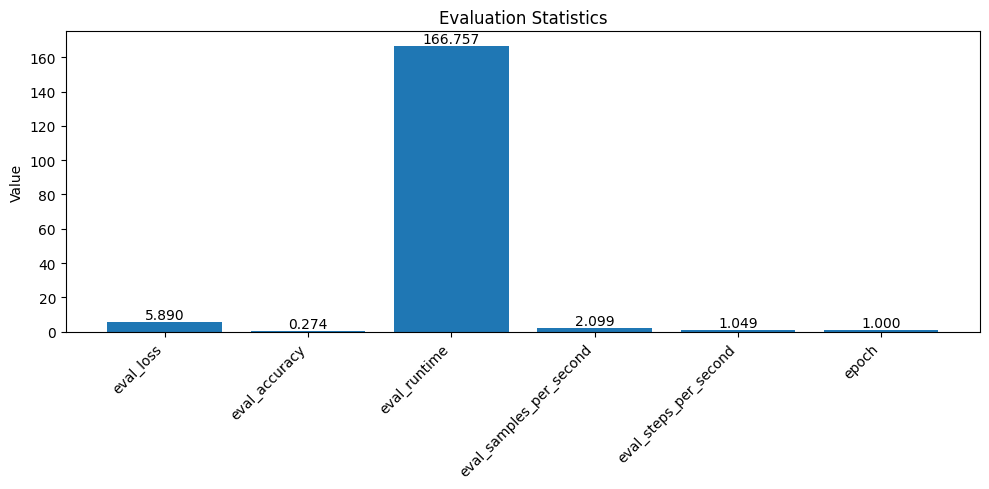

In [13]:
# Bar Plot
import matplotlib.pyplot as plt

labels = list(stats.keys())
values = list(stats.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, values)

# Add labels on top of each bar
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{value:.3f}",
        ha='center',
        va='bottom'
    )

plt.xticks(rotation=45, ha='right')
plt.ylabel("Value")
plt.title("Evaluation Statistics")
plt.tight_layout()
plt.show()